<a href="https://colab.research.google.com/github/kellyneves781/classificacao1/blob/main/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [27]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("uciml/adult-census-income")

print("Path to dataset files:", path)

df = pd.read_csv(os.path.join(path, 'adult.csv'))

df.head()

Path to dataset files: /kaggle/input/adult-census-income


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


O dataset não tem valores nulos, mas tem dados categóricos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Como há dados categóricos, é necessário transformar em numéricos.

In [5]:
label_encoders = {}
for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


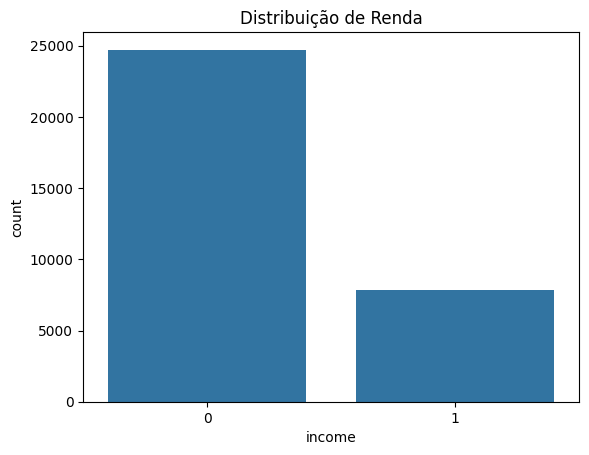

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='income', data=df)
plt.title('Distribuição de Renda')
plt.show()

Para o treinamento do modelo devemos separar a variável income e dividir os dados de treinamento e de teste.

In [8]:
X = df.drop('income', axis=1)
y = df['income']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Para treinar, foi utilizado dois modelos, Árvore de Decisão e Random Forest.

In [10]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Após a previsão e avaliação métrica a partir da acurácia, precisão, Recall e F1, pode-se observar que a acurácia é de 0.81, que é muito boa, porém a distribuição de renda maior e menor que 50.000 é desbalanceada, deixando a classe de qum ganha mais de 50.000 com baixa precisão, recall e F1.

In [11]:
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7429
           1       0.60      0.59      0.60      2340

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



Já as avaliações do Random Forest foram bem melhores, pois esse modelo se adequa mais a classes desbalanceadas. O modelo obteve acurácia geral de 0.86 e melhor previsão para quem ganha mais de 50.000, com melhora na precisão e F1.

In [12]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7429
           1       0.74      0.61      0.67      2340

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



A matriz de confusão é muito interessante para observar o desempenho dos dois modelos. Dá para visualizar o quanto o modelo Random Forest obteve mais acertos, porém a quantidade de falsos negativos ficou um pouco alta ainda

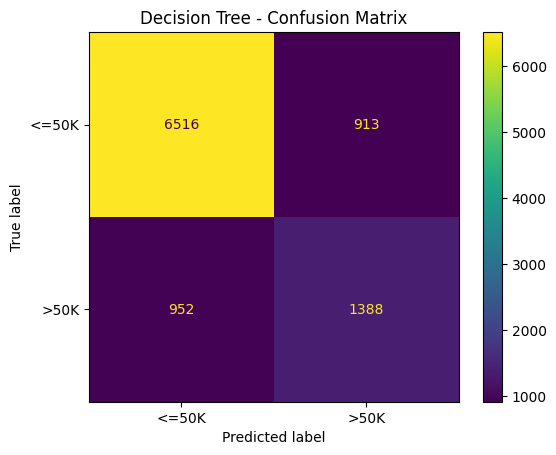

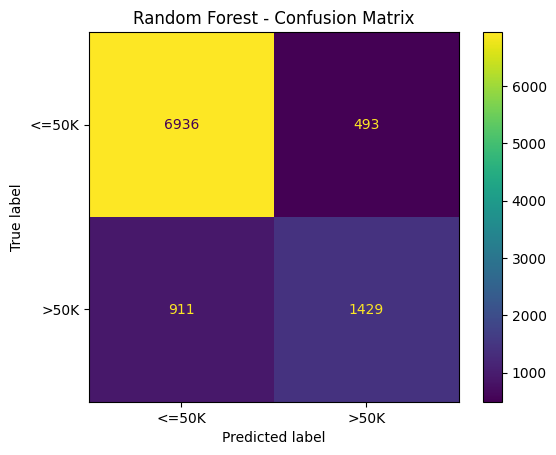

In [13]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt), display_labels=["<=50K", ">50K"]).plot()
plt.title("Decision Tree - Confusion Matrix")
plt.show()

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=["<=50K", ">50K"]).plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()


Na importância dos atributos, o peso da amostra (fnlwgt) ocupa o primeiro lugar de importância, mas não faz sentido essa variável ser válida pois não é uma característica pessoal. A pesar disso, pode-se observar a importância da idade, do ganho de capital, relações familiares e etc, na classificação de renda.

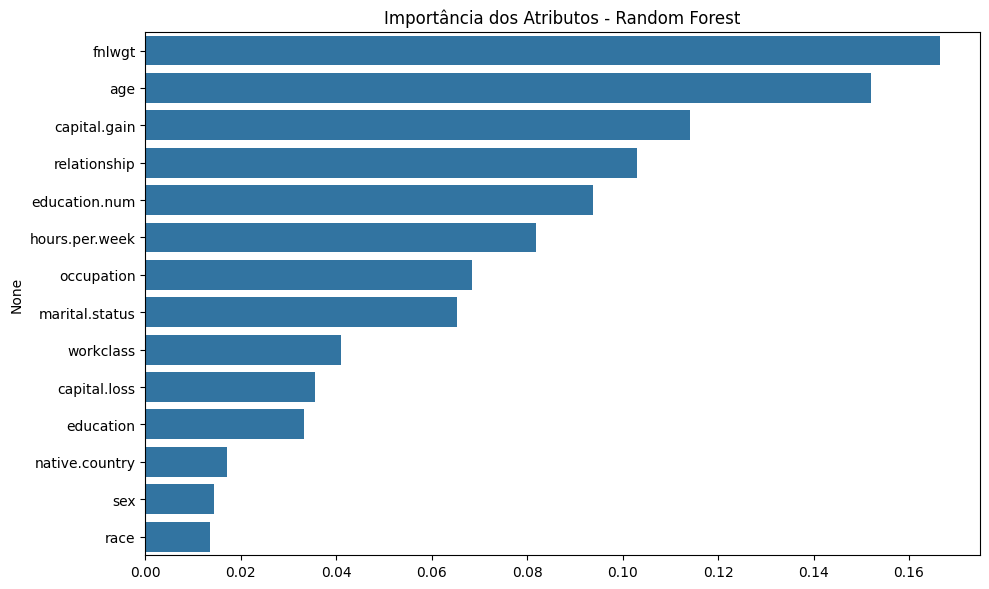

In [14]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Importância dos Atributos - Random Forest")
plt.tight_layout()
plt.show()

Observando a distribuição de idade encontramos a maioria das pessoas em idade ativa, o qie era de se esperar. O padrão de horas de trabalho foi de 40h semanais.

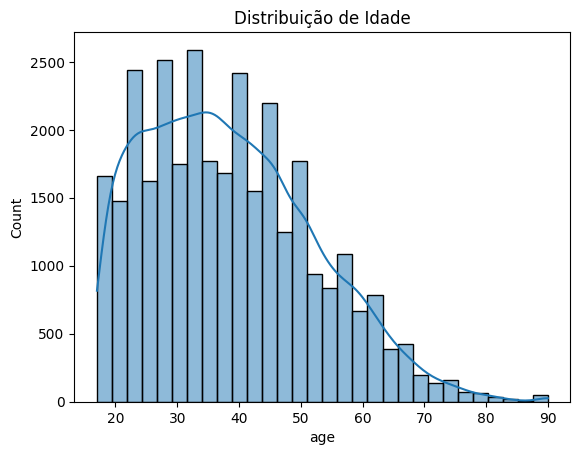

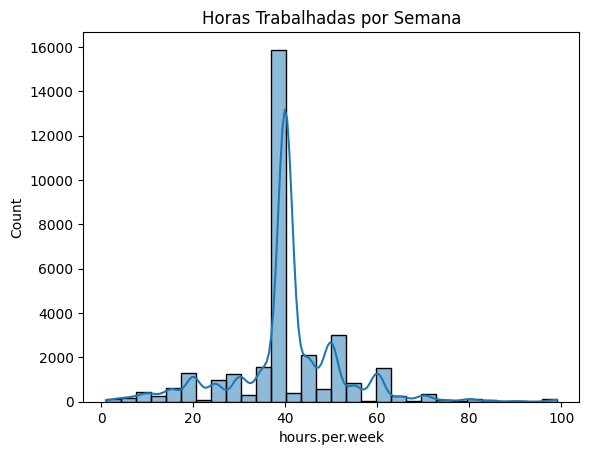

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribuição de Idade')
plt.show()

sns.histplot(df['hours.per.week'], bins=30, kde=True)
plt.title('Horas Trabalhadas por Semana')
plt.show()

A correlação entre as variáveis não mostra correlações muito fortes, as variáveis mais relacionadas são educação e renda, com 0.34 de correlação.

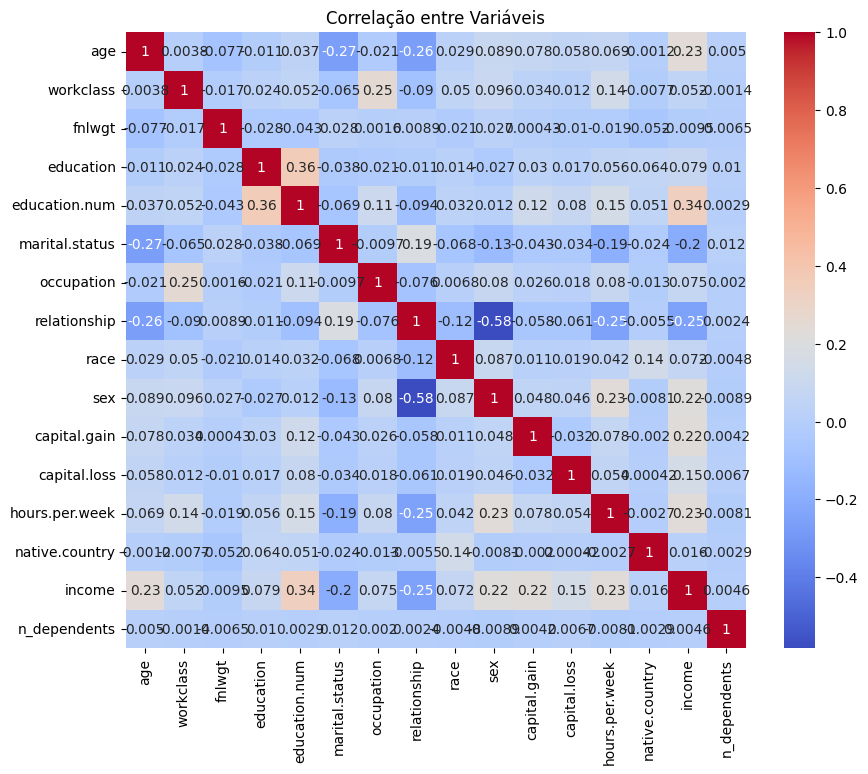

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()
